In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

/home/djjin/anaconda3/envs/conda_visual_HPE/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_May__3_18:49:52_PDT_2022
Cuda compilation tools, release 11.7, V11.7.64
Build cuda_11.7.r11.7/compiler.31294372_0
torch:  1.13 ; cuda:  cu117
detectron2: 0.6


In [2]:
from detectron2.utils.logger import setup_logger
setup_logger()

import os, sys
home_dir = os.path.abspath(os.getcwd()+"/../")
sys.path.append(home_dir)
home_dir = os.path.abspath(os.getcwd())
sys.path.append(home_dir)
print(home_dir)

from utils.arguments import load_vcoco_opt_command
from utils.distributed import init_distributed

/home/djjin/Mygit/X-Decoder/notebooks


Invalid MIT-MAGIC-COOKIE-1 key

In [3]:
opt, cmdline_args = load_vcoco_opt_command(home_dir)
opt = init_distributed(opt)

In [4]:
from datasets.registration.register_vcoco_dataset import register_all_vcoco
_root = os.getenv("DATASET", "../datasets")
register_all_vcoco(_root)

datasets/ADE20K_2021_17_01/images_detectron2/training
datasets/ADE20K_2021_17_01/images_detectron2/validation


In [5]:
from datasets.build import build_train_dataloader
train_data_loader = [build_train_dataloader(opt)]
dataset_names = opt['DATASETS']['TRAIN']

[07/13 18:58:37 d2.data.common]: Serializing 5400 elements to byte tensors and concatenating them all ...
[07/13 18:58:37 d2.data.common]: Serialized dataset takes 3.62 MiB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[204, 112, 516, 544], [191, 50, 466, 433], [189, 217, 670, 535]]
204 112 516 544
191 50 466 433
189 217 670 535


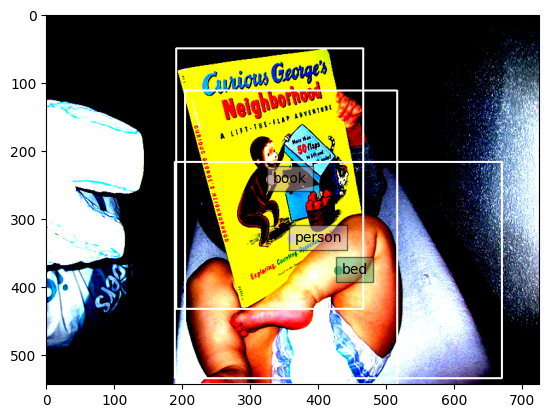

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[304, 422, 797, 853], [172, 131, 407, 462], [0, 338, 265, 861], [0, 239, 180, 374], [193, 0, 800, 853], [11, 328, 339, 656], [68, 845, 768, 1053], [69, 838, 777, 1066], [336, 35, 530, 397], [0, 337, 251, 861], [517, 0, 780, 301], [133, 0, 256, 132], [55, 176, 240, 310]]
304 422 797 853
172 131 407 462
0 338 265 861
0 239 180 374
193 0 800 853
11 328 339 656
68 845 768 1053
69 838 777 1066
336 35 530 397
0 337 251 861
517 0 780 301
133 0 256 132
55 176 240 310


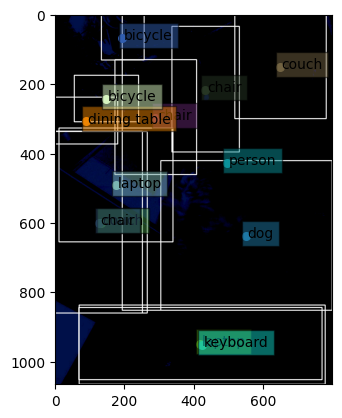

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[19, 245, 441, 512], [451, 127, 589, 412], [702, 141, 765, 323], [405, 246, 472, 335], [473, 389, 605, 427], [665, 275, 710, 325], [670, 182, 685, 229], [607, 191, 615, 201], [659, 187, 671, 201], [368, 299, 398, 319], [146, 295, 200, 325], [312, 102, 341, 178], [343, 101, 376, 216], [373, 100, 403, 202], [402, 105, 428, 212], [411, 315, 480, 329], [278, 99, 311, 184], [692, 314, 769, 330], [614, 190, 624, 206], [627, 190, 635, 214], [687, 193, 694, 202], [0, 95, 271, 479]]
19 245 441 512
451 127 589 412
702 141 765 323
405 246 472 335
473 389 605 427
665 275 710 325
670 182 685 229
607 191 615 201
659 187 671 201
368 299 398 319
146 295 200 325
312 102 341 178
343 101 376 216
373 100 403 202
402 105 428 212
411 315 480 329
278 99 311 184
692 314 769 330
614 190 624 206
627 190 635 214
687 193 694 202
0 95 271 479


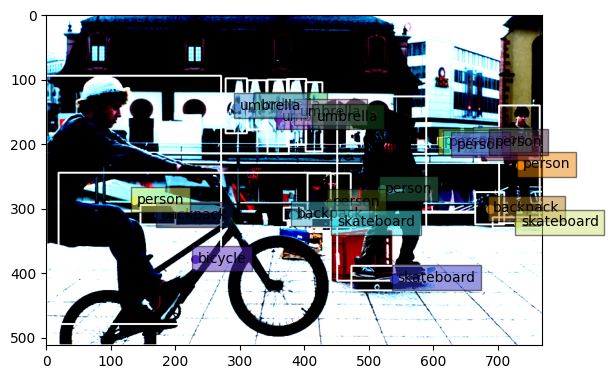

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[698, 129, 925, 665], [338, 96, 488, 582], [700, 203, 764, 266]]
698 129 925 665
338 96 488 582
700 203 764 266


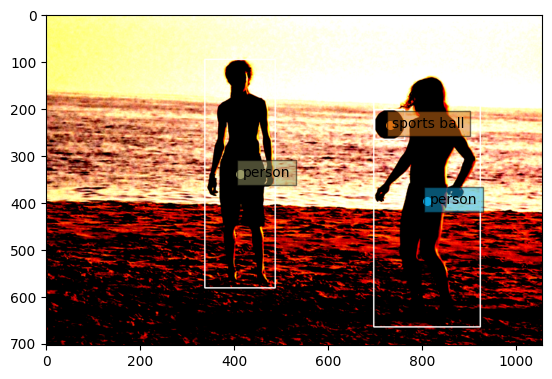

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1008, 52, 1147, 231], [215, 38, 340, 184], [142, 27, 1031, 699], [981, 220, 1070, 261], [0, 110, 179, 227], [1108, 97, 1182, 225], [1132, 3, 1221, 195], [288, 0, 416, 181], [220, 39, 336, 183], [0, 0, 226, 159], [1008, 5, 1109, 152]]
1008 52 1147 231
215 38 340 184
142 27 1031 699
981 220 1070 261
0 110 179 227
1108 97 1182 225
1132 3 1221 195
288 0 416 181
220 39 336 183
0 0 226 159
1008 5 1109 152


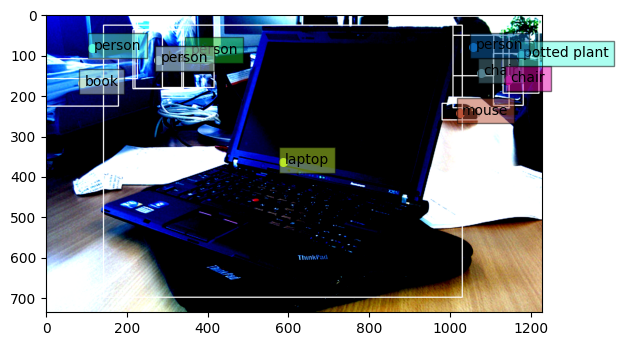

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[430, 283, 645, 704], [222, 112, 758, 702]]
430 283 645 704
222 112 758 702


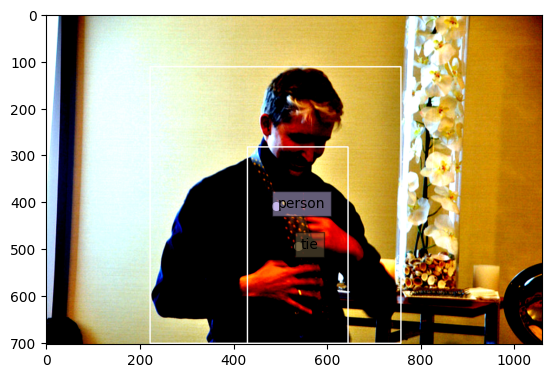

In [8]:
import cv2, random
from datasets.utils.vcoco_utils import valid_obj_ids, get_coco_instance_ID_to_name
from matplotlib import pyplot as plt
def random_color():
    rdn = random.randint(1, 1000)
    b = int(rdn * 997) % 255
    g = int(rdn * 4447) % 255
    r = int(rdn * 6563) % 255
    return b, g, r

for dataloader, dataset_name in zip(train_data_loader, dataset_names):
    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            if idx > 2:
                break
            for test in batch:
                target_img = test["image"]
                target = test["instances"]
                img = target_img.permute(1, 2, 0).detach().cpu().numpy()
                hh, ww = img.shape[0], img.shape[1]
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                obj_labels = []
                labels = []
                verb_names = []
                ob_boxes = []
                sub_boxes = []

                obj_boxes = target['boxes']
                for test in range(obj_boxes.shape[0]):
                    cx, cy, w, h = obj_boxes[test]
                    color = random_color()
                    cx, cy, w, h = cx * ww, cy * hh, w * ww, h * hh
                    n_box = list(map(int, [cx - 0.5 * w, cy - 0.5 * h, cx + 0.5 * w, cy + 0.5 * h]))
                    x1, y1, x2, y2 = n_box
                    ob_boxes.append(n_box)
                    
                for idx in target['labels']:
                    label_name = get_coco_instance_ID_to_name(valid_obj_ids[idx])
                    labels.append(label_name)

                for label, box in zip(labels, ob_boxes):
                    color = random_color()
                    x1, y1, x2, y2 = box
                    print(x1, y1, x2, y2)
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

                    x = (x1 + x2) / 2
                    y = (y1 + y2) / 2

                    plt.scatter(x, y, 30, color=[i/255 for i in color])
                    plt.text(
                        x + 5,
                        y + 5,
                        label,
                        fontsize=10,
                        bbox=dict(facecolor=[i/255 for i in color], alpha=0.5),
                        )

                plt.imshow(img)
                plt.show()

In [ ]:
dataloaders = build_train_dataloader(opt)
# dataset_names = opt['DATASETS']['TEST']
# dataloaders

vcoco_train


TypeError: build_hoi_test_loader() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
for dataloader, dataset_name in zip(dataloaders, dataset_names):
    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            for test in batch:
                target_img = test["image"]
                target = test["instances"]